In [8]:
# Import functions and libraries
from __future__ import division
import numpy as np, matplotlib.pyplot as plt
from numpy import *
from numpy.fft import *
from scipy.signal import fftconvolve
from matplotlib.pyplot import *
from rtlsdr import RtlSdr

%matplotlib inline

In [9]:
# Setup the SDRs

fs = 1e6
f0 = 96.3e6

sdr0 = RtlSdr(device_index=0)
sdr1 = RtlSdr(device_index=1)
sdr2 = RtlSdr(device_index=2)


sdr0.sample_rate = fs
sdr0.center_freq = f0
sdr0.gain = 36

sdr1.sample_rate = fs
sdr1.center_freq = f0
sdr1.gain = 36

sdr1.sample_rate = fs
sdr1.center_freq = f0
sdr1.gain = 36

In [10]:
#Collect samples from the arrays

t_total = 4             # 4 seconds
N_samples = 1024000*t_total   # ~4 seconds of samples
y0 = sdr0.read_samples(N_samples)
y1 = sdr1.read_samples(N_samples)
y2 = sdr2.read_samples(N_samples)

sdr0.close()
sdr1.close()
sdr2.close()

In [11]:
# Save SDR output

np.save("sdr_output_0_tri.npy", y0)
np.save("sdr_output_1_tri.npy", y1)
np.save("sdr_output_2_tri.npy", y2)

In [ ]:
n_trials = 10

for i in trials:
    fs = 1e6
    f0 = 96.3e6

    sdr0 = RtlSdr(device_index=0)
    sdr1 = RtlSdr(device_index=1)
    sdr2 = RtlSdr(device_index=2)


    sdr0.sample_rate = fs
    sdr0.center_freq = f0
    sdr0.gain = 36

    sdr1.sample_rate = fs
    sdr1.center_freq = f0
    sdr1.gain = 36

    sdr1.sample_rate = fs
    sdr1.center_freq = f0
    sdr1.gain = 36
    
    t_total = 4             # 4 seconds
    N_samples = 1024000*t_total   # ~4 seconds of samples
    y0 = sdr0.read_samples(N_samples)
    y1 = sdr1.read_samples(N_samples)
    y2 = sdr2.read_samples(N_samples)

    sdr0.close()
    sdr1.close()
    sdr2.close()
    
    np.save("sdr_output_0_phase_trial-%d.npy" % i, y0)
    np.save("sdr_output_1_phase_trial-%d.npy" % i, y1)
    np.save("sdr_output_2_phase_trial-%d.npy" % i, y2)

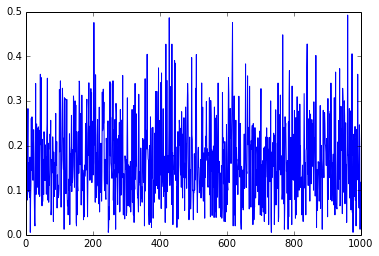

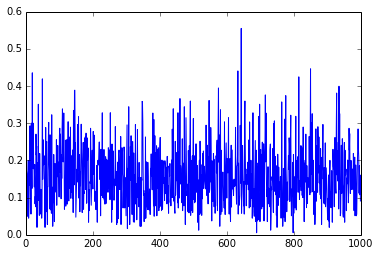

In [12]:
plt.figure()
plt.plot(np.abs(y0[:1000]))
plt.figure()
plt.plot(np.abs(y1[:1000]))

In [14]:
xcorr = fftconvolve(y0, y1[::-1])

8191999
8191999
-0.000673


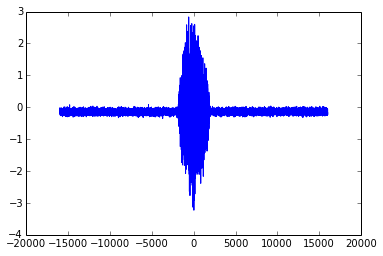

In [31]:
idxs = np.r_[-y1.size:y0.size-1]
print idxs.size
print xcorr.size

plt.plot(idxs[4080000:-4080000], xcorr[4080000:-4080000])

idx_offset = idxs[np.argmax(np.abs(xcorr))]
t_offset = idx_offset/float(fs)

print t_offset

In [33]:
def sg_plot( t_range, f_range, y, dbf = 60) :
    eps = 1e-3
    y_phase = np.angle(y)
    # find maximum

    # compute 20*log magnitude, scaled to the max
    fig=figure(figsize=(15,6))
    
    plt.imshow( y_phase, extent= t_range  + f_range ,cmap=plt.cm.gray, aspect='auto')
    plt.xlabel('Time, s')
    plt.ylabel('Frequency, Hz')
    plt.tight_layout()


def myphaseogram_hann_ovlp(x, m, fs, fc,dbf = 60):
    # Plot the spectrogram of x.
    # First take the original signal x and split it into blocks of length m
    # This corresponds to using a rectangular window %
    
    
    isreal_bool = isreal(x).all()
    
    # pad x up to a multiple of m 
    lx = len(x);
    nt = (lx + m - 1) // m
    x = append(x,zeros(-lx+nt*m))
    x = x.reshape((m/2,nt*2), order='F')
    x = concatenate((x,x),axis=0)
    x = x.reshape((m*nt*2,1),order='F')
    x = x[r_[m//2:len(x),ones(m//2)*(len(x)-1)].astype(int)].reshape((m,nt*2),order='F')
    
    
    xmw = x * hanning(m)[:,None];
    
    
    # frequency index
    t_range = [0.0, lx / fs]
    
    if isreal_bool:
        f_range = [ fc, fs / 2.0 + fc]
        xmf = np.fft.fft(xmw,len(xmw),axis=0)
        sg_plot(t_range, f_range, xmf[0:m/2,:],dbf=dbf)
        print 1
    else:
        f_range = [-fs / 2.0 + fc, fs / 2.0 + fc]
        xmf = np.fft.fftshift( np.fft.fft( xmw ,len(xmw),axis=0), axes=0 )
        sg_plot(t_range, f_range, xmf,dbf = dbf)
    
    return t_range, f_range, xmf

In [43]:
phase0 = np.angle(np.fft.fft(y0))
phase1 = np.angle(np.fft.fft(y1))

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(phase0[::5])
plt.figure(figsize=(16,5))
plt.plot(phase1[::5])